<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/survival-analysis-cox-regression-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# Cox Regression

## Introduction

**Cox Regression**, also known as the **Cox Proportional Hazards Model**, is a statistical technique widely used in survival analysis to study the relationship between survival time (time-to-event) and one or more predictor variables (covariates). Developed by Sir David Cox in 1972, this semi-parametric model is particularly useful because it does not require the specification of a baseline hazard function, making it flexible for analyzing survival data.

***Key Concepts of Cox Regression***:

1. **Hazard Function**:
   - The hazard function $h(t)$ represents the instantaneous rate at which events occur at time $t$, given that the subject has survived up to time $t$. It can be thought of as the risk of an event occurring in the next instant of time.

2. **Proportional Hazards Assumption**:
   - The key assumption of Cox regression is that the hazard ratios between different levels of the covariates are **proportional** over time. This means that the effect of the covariates on survival is constant and does not change as time progresses.

3. **Semi-parametric Model**:
   - The Cox model is called semi-parametric because it does not require a specific form for the baseline hazard function, \( h_0(t) \), making it flexible. It estimates the effect of covariates on the hazard function while leaving the baseline hazard unspecified.

4. **Hazard Ratio (HR)**:
   - The model estimates the **hazard ratio**, which quantifies the effect of a covariate on the hazard. A hazard ratio of:
     - **HR = 1**: No effect (covariate does not influence the risk).
     - **HR > 1**: Increased hazard (higher risk of the event).
     - **HR < 1**: Decreased hazard (lower risk of the event).

***Cox Proportional Hazards Model Equation:***

The Cox model can be written as:

$$ h(t|X) = h_0(t) \cdot \exp(\beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p) $$

Where:
- $h(t|X)$ is the hazard at time $t$ for an individual with covariates $X_1, X_2, \dots, X_p$.
- $h_0(t)$ is the baseline hazard function (the hazard when all covariates are zero).
- $\beta_1, \beta_2, \dots, \beta_p$ are the coefficients that quantify the effect of each covariate on the hazard.
- $X_1, X_2, \dots, X_p$ are the covariates (predictors or risk factors).

The quantity $\exp(\beta)$ is the hazard ratio (HR) for each covariate, which represents the relative risk associated with a one-unit increase in that covariate.

***Steps in Cox Regression***:

1. **Model Fitting**: Fit the Cox model to the survival data by estimating the regression coefficients $\beta$ for the covariates.
2. **Estimate Hazard Ratios**: Compute the hazard ratios $\exp(\beta)$, which tell how much the risk of the event changes with a one-unit increase in each covariate.
3. **Check the Proportional Hazards Assumption**: Verify if the proportional hazards assumption holds by assessing whether the hazard ratios remain constant over time.
4. **Interpretation**: Interpret the hazard ratios to understand how the covariates influence the time to event.





## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314951 sha256=ac0cfc7651a0ebced7155d3cb534a79a61b8b2a5df19fb9d4a828d5d407d5fb1
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Cox Regression in R

This tutorial is mostly used two R packages [{survival}](https://cran.r-project.org/web/packages/survival/index.html) and [{ggsurvfit}](https://www.danieldsjoberg.com/ggsurvfit/). Additionally we will use [{ggfortify}](https://github.com/sinhrks/ggfortify) which offers `fortify` and `autoplot` functions to allow automatic ggplot2 to visualize Kaplan-Meier plots.



### Install Required R Packages



In [ ]:
%%R
pkg <- c('tidyverse',
     'plyr',
		 'gt',
		 'DataExplorer',
		 'rstatix',
		 'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'caret',
		 'tidymodels',
		 'metrica',
		 'RColorBrewer',
     'MASS',
     'epiDisplay',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		  'ggfortify'
		 )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
devtools::install_github("zabore/condsurv", lib='drive/My Drive/R/')

### Load R packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(DataExplorer)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
library(ggpmisc)
library(RColorBrewer)
library(MASS)
library(epiDisplay)
library(survival)
library(survminer)
library(ggsurvfit)
library(tidycmprsk)
library(condsurv)
library(ggfortify)

### Data

## Data

We will be utilizing the `lung` dataset from the {survival} package, which serves as a valuable resource for analyzing survival data.

Throughout this tutorial, we will concentrate on the variables that provide insight into the patients' demographics and clinical outcomes:

* inst: Institution code
* time: Survival time in days
* status: censoring status 1=censored, 2=dead
* age: Age in years
* sex: Male=1 Female=2
* ph.ecog: ECOG performance score (0=good 5=dead)
* ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
* pat.karno: Karnofsky performance score as rated by patient
* meal.cal: Calories consumed at meals
* wt.loss: Weight loss in last six months

In [ ]:
%%R
data(lung)
glimpse(lung)

Rows: 228
Columns: 10
$ inst      <dbl> 3, 3, 3, 5, 1, 12, 7, 11, 1, 7, 6, 16, 11, 21, 12, 1, 22, 16…
$ time      <dbl> 306, 455, 1010, 210, 883, 1022, 310, 361, 218, 166, 170, 654…
$ status    <dbl> 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ age       <dbl> 74, 68, 56, 57, 60, 74, 68, 71, 53, 61, 57, 68, 68, 60, 57, …
$ sex       <dbl> 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, …
$ ph.ecog   <dbl> 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, NA, 1, 1, 1, 2, 2, 1,…
$ ph.karno  <dbl> 90, 90, 90, 90, 100, 50, 70, 60, 70, 70, 80, 70, 90, 60, 80,…
$ pat.karno <dbl> 100, 90, 90, 60, 90, 80, 60, 80, 80, 70, 80, 70, 90, 70, 70,…
$ meal.cal  <dbl> 1175, 1225, NA, 1150, NA, 513, 384, 538, 825, 271, 1025, NA,…
$ wt.loss   <dbl> NA, 15, 15, 11, 0, 0, 10, 1, 16, 34, 27, 23, 5, 32, 60, 15, …


### Data processing

Now we will re-code the data as 1=event, 0=censored:

In [ ]:
%%R
lung <-
  lung |>
  mutate(
    status = recode(status, `1` = 0, `2` = 1)
  )

Now we have:

-   time: Observed survival time in days
-   status: censoring status 0=censored, 1=dead
-   sex: 1=Male, 2=Female

In [ ]:
%%R
head(lung[, c("time", "status", "sex")])

  time status sex
1  306      1   1
2  455      1   1
3 1010      0   1
4  210      1   1
5  883      1   1
6 1022      0   1


## Fit a Cox Proportional Hazards Model

In this example, we will model the relationship between survival time and covariates like age and sex. The `coxph()` function from the {survival} package is used to fit a Cox proportional hazards model in R.

- coxph(formula, data, method)*italicized text*

### Univariate Cox regression

We will fit Cox regression model with one covariate, `sex` to  see difference in survival rate between male and female participants.

In [ ]:
%%R
cox.fit.uni <- coxph(Surv(time, status) ~ sex,  data = lung)
cox.fit.uni

Call:
coxph(formula = Surv(time, status) ~ sex, data = lung)

       coef exp(coef) se(coef)      z       p
sex -0.5310    0.5880   0.1672 -3.176 0.00149

Likelihood ratio test=10.63  on 1 df, p=0.001111
n= 228, number of events= 165 


In [ ]:
%%R
summary(cox.fit.uni)

Call:
coxph(formula = Surv(time, status) ~ sex, data = lung)

  n= 228, number of events= 165 

       coef exp(coef) se(coef)      z Pr(>|z|)   
sex -0.5310    0.5880   0.1672 -3.176  0.00149 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
sex     0.588      1.701    0.4237     0.816

Concordance= 0.579  (se = 0.021 )
Likelihood ratio test= 10.63  on 1 df,   p=0.001
Wald test            = 10.09  on 1 df,   p=0.001
Score (logrank) test = 10.33  on 1 df,   p=0.001



**Statistical Significance**:  The column labeled `z` presents the `Wald statistic` value, which is calculated as the ratio of each regression coefficient to its standard error (`z = coef/se(coef)`). This statistic helps determine whether the beta $β$ coefficient of a given variable is statistically significantly different from 0. Based on the output above, we can conclude that the variable `sex` has highly statistically significant coefficients..

The **regression coefficients** are an important aspect of the Cox model results. Notably, the sign of the regression coefficients (coef) indicates the relationship between the variable and the hazard (risk of death). A positive coefficient suggests that as the value of the variable increases, the hazard also increases, leading to a poorer prognosis for those subjects.

**Hazard ratios**. The exponentiated coefficients (`exp(coef) = exp(-0.53) = 0.59`), also known as hazard ratios, give the effect size of covariates. So the `HR = 0.59` implies that 0.59 times as many females are dying as males, at any given time. Stated differently, females have a significantly lower hazard of death than males in these data.

**Confidence intervals** for the hazard ratios are provided. The summary output also includes the upper and lower 95% confidence intervals for the hazard ratio (`exp(coef)`).

The **global statistical significance of the model** is assessed using three alternative tests: the `likelihood-ratio test`, the `Wald test`, and the `score logrank statistic`. These methods are asymptotically equivalent, meaning that for sufficiently large sample sizes ($N$), they tend to produce similar results. However, for smaller sample sizes, the results may vary. Among these tests, the likelihood-ratio test is generally preferred because it performs better with small sample sizes.

You may use `report()` function of {report}  package to get a brief summary of fitted Cox regression model:

In [ ]:
%%R
report::report(cox.fit.uni)

  is probably not reliable.

  is probably not reliable.



We fitted a logistic model to predict Surv(time, status) with sex (formula:
Surv(time, status) ~ sex). The model's explanatory power is weak (Nagelkerke's
R2 = 0.05).  Within this model:

  - The effect of sex is statistically significant and negative (beta = -0.53,
95% CI [-0.86, -0.20], p = 0.001; Std. beta = -0.23, 95% CI [-0.42, -0.05])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald z-distribution approximation.


In [ ]:
%%R
performance(cox.fit.uni)

  is probably not reliable.



# Indices of model performance

AIC      |     AICc |      BIC | Nagelkerke's R2 |  RMSE | Sigma
----------------------------------------------------------------
1491.186 | 1491.204 | 1494.615 |           0.046 | 0.859 | 0.000


To apply the univariate `coxph` function to all covariates at once, we may use follwing code: (source: [Cox Proportional-Hazards Model](http://www.sthda.com/english/wiki/cox-proportional-hazards-model))


In [ ]:
%%R
covariates <- c("age", "sex",  "ph.karno", "ph.ecog", "wt.loss")
univ_formulas <- sapply(covariates,
                        function(x) as.formula(paste('Surv(time, status)~', x)))

univ_models <- lapply( univ_formulas, function(x){coxph(x, data = lung)})
# Extract data
univ_results <- lapply(univ_models,
                       function(x){
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (",
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test",
                                        "p.value")
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE))
as.data.frame(res)

           beta HR (95% CI for HR) wald.test p.value
age       0.019            1 (1-1)       4.1   0.042
sex       -0.53   0.59 (0.42-0.82)        10  0.0015
ph.karno -0.016      0.98 (0.97-1)       7.9   0.005
ph.ecog    0.48        1.6 (1.3-2)        18 2.7e-05
wt.loss  0.0013         1 (0.99-1)      0.05    0.83


The output provides a detailed display of the regression beta coefficients, which quantify the relationship between each variable and overall survival. Additionally, it includes the hazard ratios that indicate the effect sizes associated with these variables, along with their statistical significance. Each factor is evaluated through distinct univariate Cox regression analyses, allowing for a clear understanding of how individual variables impact survival outcomes.

### Multivariate Cox regression analysis

Our objective is to explore how several factors work together to affect survival outcomes. To achieve this, we will perform a multivariate Cox regression analysis, a statistical method that allows us to evaluate the impact of multiple variables simultaneously.

In our initial univariate analysis, we found that the variable **ph.karno** did not show significant relevance to survival, leading us to exclude it from our multivariate model. Instead, we will focus on three key factors that are likely to influence survival: sex, age, and **ph.ecog**.

The following is the specification for the Cox regression model, which examines the relationship between time to death and the selected time-constant covariates:

In [ ]:
%%R
cox.fit.multi <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  lung)
summary(cox.fit.multi)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.025 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06



The `p-values` from the three tests (l`ikelihood, Wald, and score`) show that our model is significant. These tests check the overall hypothesis that all coefficients ($β$) are zero. In this case, the test results agree closely, allowing us to reject this hypothesis.

In the multivariate Cox analysis, the variables sex and ph.ecog are significant ($p < 0.05$). However, the variable age is not significant ($p = 0.23$, which is greater than 0.05).

The p-value for sex is 0.000986. The `hazard ratio (HR)` is `exp(coef) = 0.58`, meaning there is a strong link between sex and a lower risk of death. For example, when we keep other factors constant, being female (sex=2) reduces the risk by 42%. This suggests that being female is associated with a better outcome.

The `p-value` for ph.ecog is 4.45e-05, with a hazard ratio (`HR`) of 1.59. This indicates a strong link between higher ph.ecog values and an increased risk of death. Keeping other factors constant, a higher ph.ecog score suggests poorer survival.

In contrast, the p-value for age is p = 0.23. The hazard ratio (`HR`) is `exp(coef) = 1.01`, with a 95% confidence interval of 0.99 to 1.03. Since the confidence interval includes 1, this means age does not significantly affect the risk of death after adjusting for sex and ph.ecog values. An additional year of age increases the daily risk of death by about 1%, which is not significant.

### Plot the baseline survival function

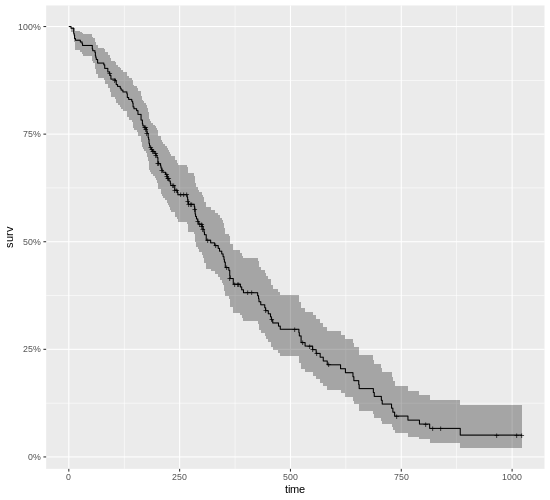

In [ ]:
%%R -h 500 -w 550 -u px

autoplot(survfit(cox.fit.multi))


## Summary and Conclusion:

The Cox Proportional Hazards Model is a powerful tool for analyzing survival data and understanding how covariates impact the risk of an event over time. It is widely used in fields like medicine, epidemiology, and engineering, where time-to-event data is prevalent. The flexibility of not having to specify the baseline hazard makes it particularly popular for modeling survival data.

In this article, we described the Cox regression model for assessing simultaneously the relationship between multiple risk factors and patient’s survival time.


## References

1.  [Survival Analysis with R](https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/)

2.  [Cox Proportional-Hazards Model](http://www.sthda.com/english/wiki/cox-proportional-hazards-model)

3.  [Survival Analysis in R](https://www.emilyzabor.com/tutorials/survival_analysis_in_r_tutorial.html)

4.  [Survival Analysis with R](https://bioconnector.github.io/workshops/r-survival.html)
: